In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from scipy.fft import fft, ifft, fftshift, ifftshift
from skimage.data import shepp_logan_phantom
from helpers.transforms import radon_transform, iradon_transform
from helpers.utils import rotate_img, get_filter, compare_recons, using_skimage

# 1. New Functions

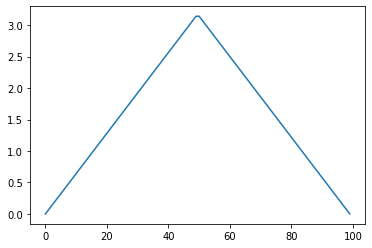

In [11]:
size = 100
s_freq = np.zeros(size)
s_freq[: size // 2] = np.linspace(0, np.pi, size // 2)
s_freq[size // 2 :] = s_freq[size // 2 - 1::-1]
plt.plot(s_freq)

(-0.1, 0.1)

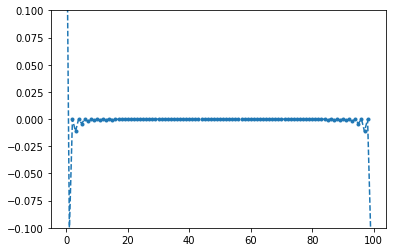

In [12]:
s_time = np.real(ifft(s_freq)) / (2 * np.pi)
plt.plot(s_time, "--.")
plt.ylim([-0.1, 0.1])

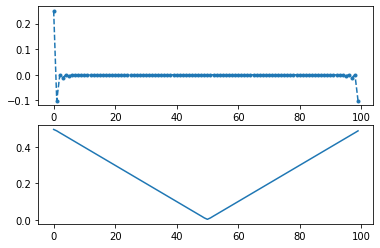

In [13]:
s_time_direct = get_filter(size, if_show=True)

In [14]:
assert np.allclose(s_time, s_time_direct, atol=1e-2)

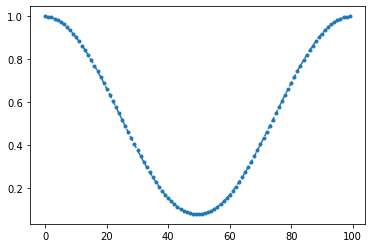

In [15]:
hamming = np.hamming(size)
plt.plot(ifftshift(hamming), "--.")

(400, 400)


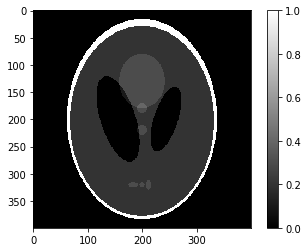

In [40]:
img = shepp_logan_phantom()
plt.imshow(img, cmap="gray")
plt.colorbar()
print(img.shape)

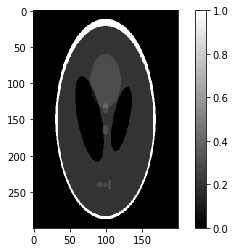

In [41]:
img_resized = cv2.resize(img, (200, 300))
plt.imshow(img_resized, cmap="gray")
plt.colorbar()

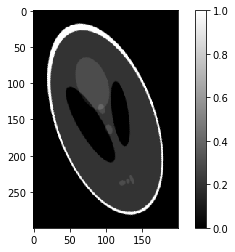

In [42]:
img_rotated = rotate_img(img_resized, 20, if_show=True)

(400, 400)


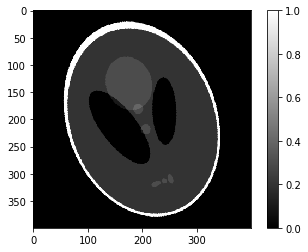

In [43]:
img_rotated = rotate_img(img, 20, if_show=True)
print(img_rotated.shape)

In [72]:
img = shepp_logan_phantom()
# img = cv2.resize(img, dsize=None, fx=0.5, fy=0.5)
# img = img[:, :-2]
img.shape

(400, 400)

# 2. Radon Transform

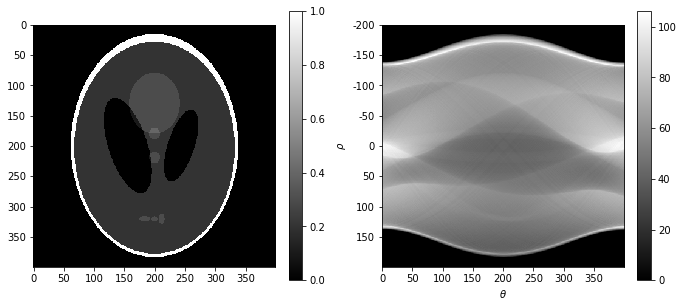

In [76]:
sinogram = radon_transform(img, if_show=True)

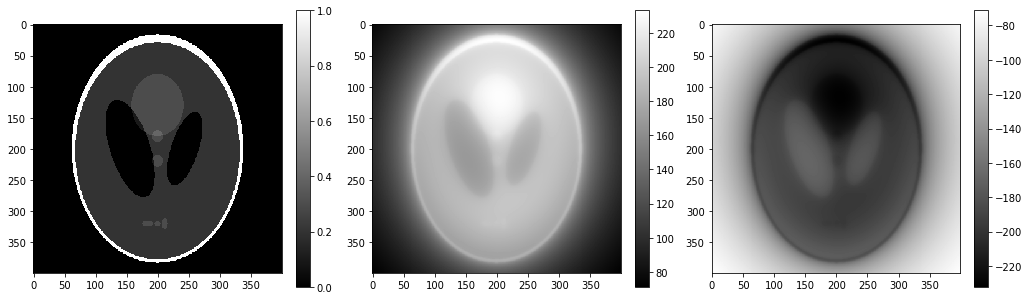

In [81]:
img_recons = iradon_transform(sinogram, use_filter=False, shape=img.shape)
compare_recons(img, img_recons)

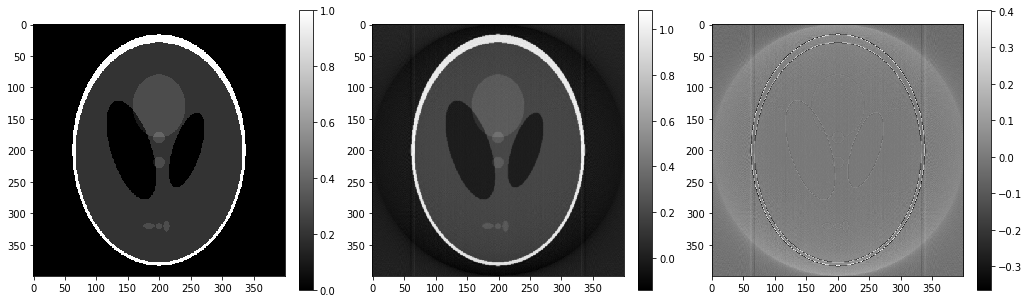

In [82]:
img_recons = iradon_transform(sinogram, shape=img.shape)
compare_recons(img, img_recons)

# 3. skimage

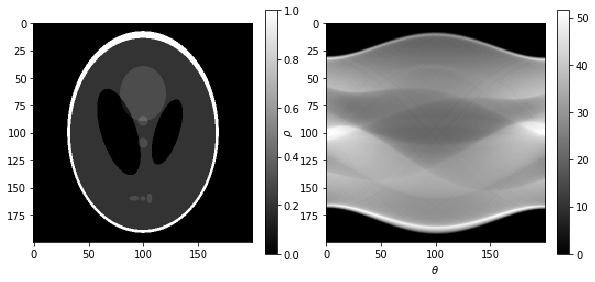

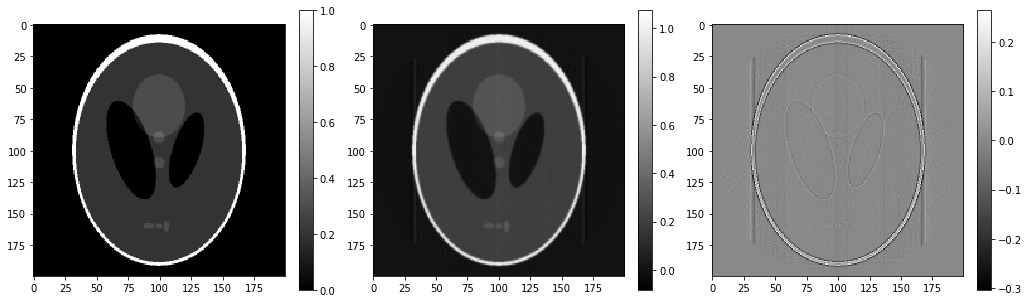

In [28]:
sinogram, img_recons = using_skimage(img)